<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id    1308890 non-null int64
date          1308890 non-null object
available     1308890 non-null object
price         643037 non-null object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
None
Before filter is 1308890
After filter is 665853


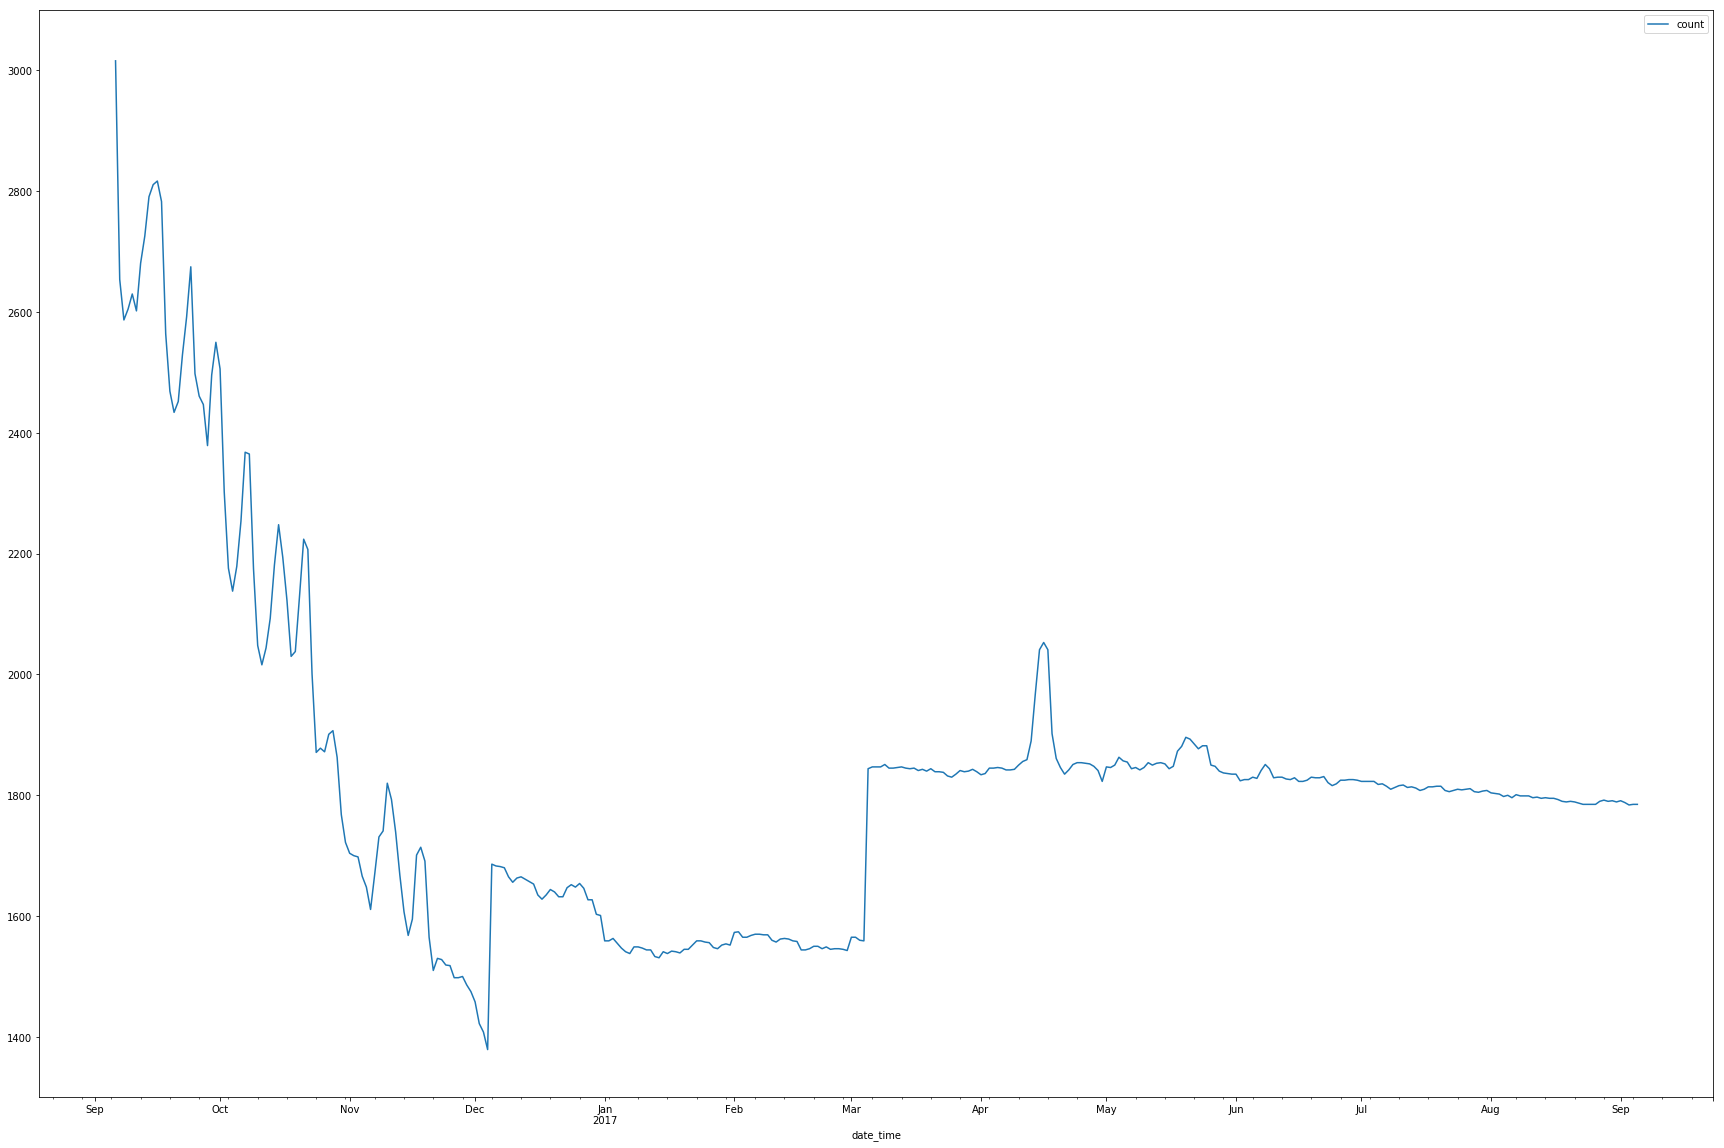

In [5]:
""""This approach is based on the number of booking to find the peak and low and also detect any possible seasonality """
import datetime as dt

# Load calendar data to variable, calendar_file
calendar_file = pd.read_csv(u'/Users/zhosheng/Desktop/Study/Udacity-Project-1/Boston/calendar.csv')

# Have glimpse of data set
print(calendar_file.info())

# Filter "availble" field on f
print('Before filter is {}'.format(calendar_file.shape[0]))
calendar_file=calendar_file[calendar_file['available']=='f']
print('After filter is {}'.format(calendar_file.shape[0]))

# Convert "date" object data type to datetime and add a new column called date_time to the existing data frame
calendar_file['date_time']=calendar_file['date'].astype('datetime64[ns]')


# Sum of number of booking on each daily 
cnt=calendar_file.groupby(['date_time'])['listing_id'].count()
cnt=cnt.to_frame()
cnt.reset_index(inplace=True)#Convert series type to data frame
cnt.rename(columns={'listing_id':'count'},inplace=True)
cnt.describe()

# Draw a line chart between 'date_time' and 'count'
cnt.plot(kind='line', x='date_time',y='count',figsize=(30,20), ylim=(1300,3100))